### 📥 Cargar librerías y datos

In [1]:
# Instalar todos los paquetes del requirements.txt desde el notebook
%pip install -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [24]:
%run ../imports.py

In [2]:
# Dataset completo ya cargado previamente:
train = pd.read_csv('../data/train/sitycleta_train.csv')
test = pd.read_csv('../data/test/sitycleta_test.csv')

train['Time stamp'] = pd.to_datetime(train['Time stamp'])
test['Time stamp'] = pd.to_datetime(test['Time stamp'])

## Modelo 1: XGBoost

XGBoost es un algoritmo de boosting basado en árboles de decisión, conocido por su alto rendimiento y eficiencia. Se entrena de forma secuencial, donde cada nuevo árbol corrige los errores del anterior.

⚙️ 1. Definir modelo

In [3]:
features = ['hour_of_day', 'day_of_week', 'is_weekend', 'month',
            'week_of_year', 'is_holiday', 'temp_c', 'precip_mm',
            'wind_speed_kmh', 'free_bikes_lag1', 'free_bikes_roll3']

X_train = train[features]
y_train = train['Free bikes']

X_test = test[features]
y_test = test['Free bikes']

model_xgb = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

⚙️ 2. Entrenar modelo

In [4]:
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

📈 3. Predicción y métricas

In [5]:
print(sklearn.__version__)

1.6.1


In [7]:
y_pred_xgb = model_xgb.predict(X_test)

#rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost → RMSE: {rmse_xgb:.2f}, MAE: {mae_xgb:.2f}, R2: {r2_xgb:.4f}")

XGBoost → RMSE: 0.67, MAE: 0.48, R2: 0.9615


📊 4. Evaluar rendimiento

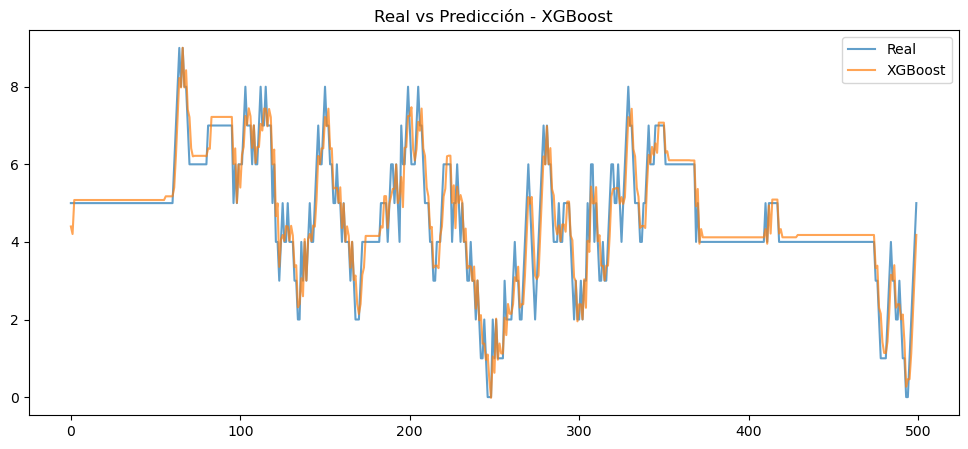

In [8]:
plt.figure(figsize=(12,5))
plt.plot(y_test.values[:500], label='Real', alpha=0.7)
plt.plot(y_pred_xgb[:500], label='XGBoost', alpha=0.7)
plt.legend()
plt.title('Real vs Predicción - XGBoost')
plt.show()

## Modelo 2: LightGBM

LightGBM es una variante de boosting más rápida y eficiente en memoria. Utiliza histogramas y crecimiento por hoja, lo que permite manejar grandes volúmenes de datos de forma muy rápida.

⚙️ 1. Definir modelo

In [9]:
model_lgb = lgb.LGBMRegressor(random_state=42)

⚙️ 2. Entrenar modelo

In [10]:
model_lgb.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034547 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 1335287, number of used features: 11
[LightGBM] [Info] Start training from score 5.001883


LGBMRegressor(random_state=42)

📈 3. Predicción y métricas

In [12]:
y_pred_lgb = model_lgb.predict(X_test)

#rmse_lgb = mean_squared_error(y_test, y_pred_lgb, squared=False)
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f"LightGBM → RMSE: {rmse_lgb:.2f}, MAE: {mae_lgb:.2f}, R2: {r2_lgb:.4f}")

LightGBM → RMSE: 0.67, MAE: 0.48, R2: 0.9617


📊 4. Gráfico

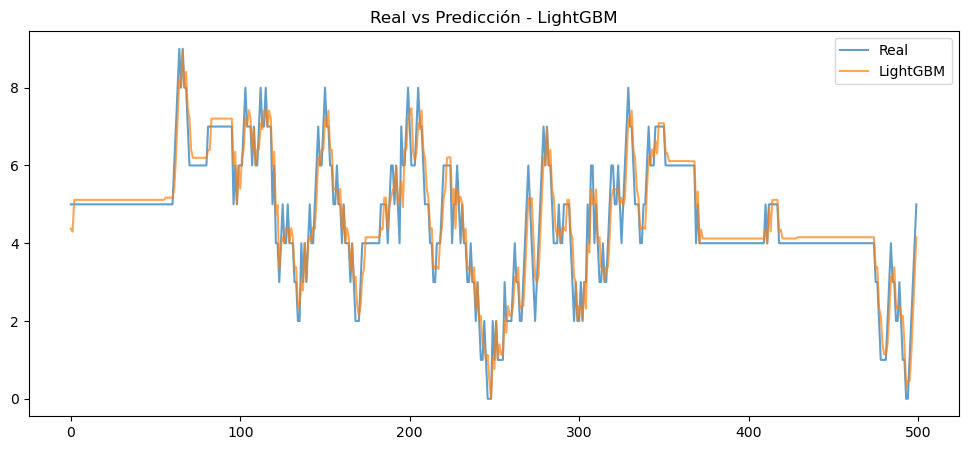

In [13]:
plt.figure(figsize=(12,5))
plt.plot(y_test.values[:500], label='Real', alpha=0.7)
plt.plot(y_pred_lgb[:500], label='LightGBM', alpha=0.7)
plt.legend()
plt.title('Real vs Predicción - LightGBM')
plt.show()

## Modelo 3: Random Forest (con scikit-learn)

Random Forest es un modelo de tipo bagging que entrena múltiples árboles de decisión independientes sobre subconjuntos aleatorios de datos. Es robusto, fácil de ajustar y útil como modelo comparativo base.

🎯 1. Definir modelo

In [15]:
features = ['hour_of_day', 'day_of_week', 'is_weekend', 'month',
            'week_of_year', 'is_holiday', 'temp_c', 'precip_mm',
            'wind_speed_kmh', 'free_bikes_lag1', 'free_bikes_roll3']

X_train = train[features]
y_train = train['Free bikes']
X_test = test[features]
y_test = test['Free bikes']

model_rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

⚙️ 2. Entrenar modelo

In [16]:
model_rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

📊 3. Evaluar rendimiento

In [17]:
y_pred_rf = model_rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest → RMSE: {rmse_rf:.2f}, MAE: {mae_rf:.2f}, R2: {r2_rf:.4f}")

Random Forest → RMSE: 0.69, MAE: 0.50, R2: 0.9590


📈 4. Visualización real vs predicción

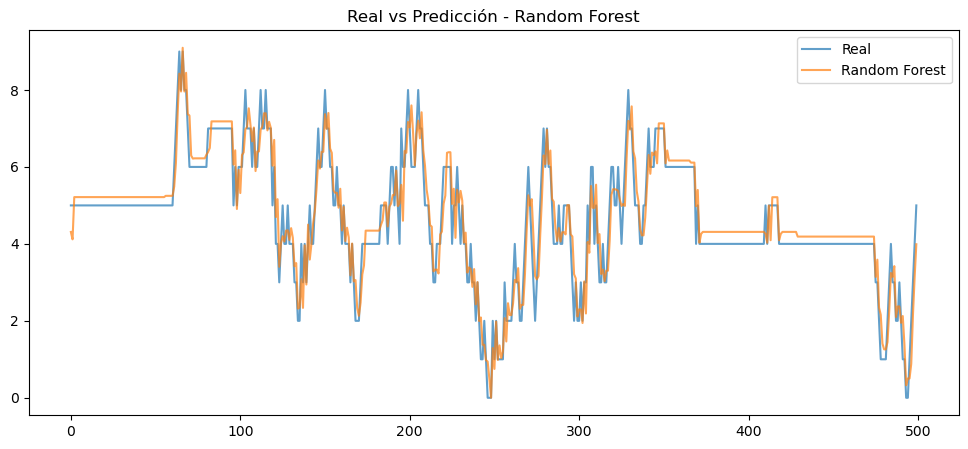

In [18]:
plt.figure(figsize=(12,5))
plt.plot(y_test.values[:500], label='Real', alpha=0.7)
plt.plot(y_pred_rf[:500], label='Random Forest', alpha=0.7)
plt.title('Real vs Predicción - Random Forest')
plt.legend()
plt.show()

## ✅ Comparación de modelos (Punto 6 del Checklist)

Se han entrenado y evaluado tres modelos predictivos usando el dataset test de abril 2025 para predecir el número de bicicletas libres (`Free bikes`).

### 📊 Resultados de rendimiento:

| Modelo         | RMSE | MAE  | R²     |
|----------------|------|------|--------|
| XGBoost        | 0.67 | 0.48 | 0.9615 |
| LightGBM       | 0.67 | 0.48 | 0.9617 |
| Random Forest  | 0.69 | 0.50 | 0.9590 |

### 🧠 Observaciones:

- Todos los modelos ofrecen un rendimiento excelente.
- LightGBM obtiene el **mayor R²**, aunque las diferencias con XGBoost son mínimas.
- Random Forest también muestra un buen ajuste, aunque con ligeras pérdidas en precisión.
- A nivel visual, los tres modelos muestran predicciones alineadas con los valores reales, incluso en los tramos de mayor variabilidad.

✅ Se recomienda **usar LightGBM o XGBoost como modelo final**, aunque cualquiera de los tres podría considerarse válido.

🔹 1. Visualización de errores residuales (LightGBM como modelo final)

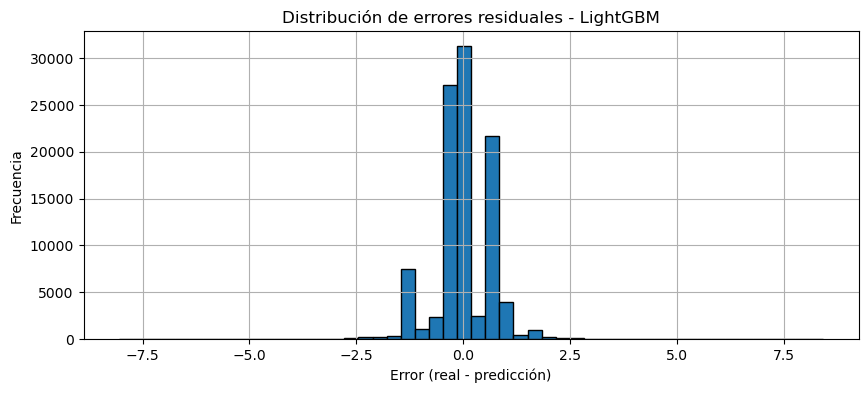

In [19]:
residuals = y_test - y_pred_lgb

plt.figure(figsize=(10, 4))
plt.hist(residuals, bins=50, edgecolor='black')
plt.title('Distribución de errores residuales - LightGBM')
plt.xlabel('Error (real - predicción)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

🔍 2. Curva de errores acumulados

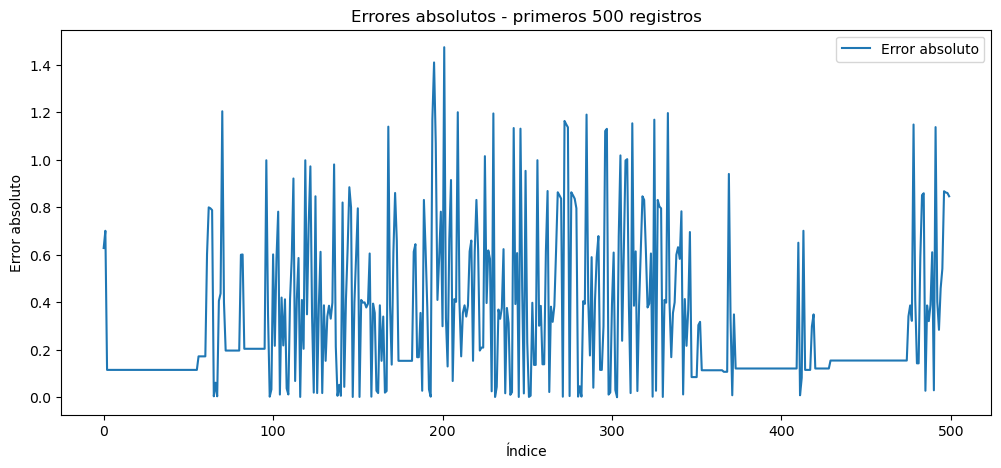

In [20]:
plt.figure(figsize=(12, 5))
plt.plot(np.abs(residuals[:500]), label='Error absoluto')
plt.title('Errores absolutos - primeros 500 registros')
plt.xlabel('Índice')
plt.ylabel('Error absoluto')
plt.legend()
plt.show()

🧭 3. Predicciones por estación

C:\Users\DevRoger\AppData\Local\Temp\ipykernel_18380\1265904793.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  error_por_estacion = test.groupby('Place number').apply(


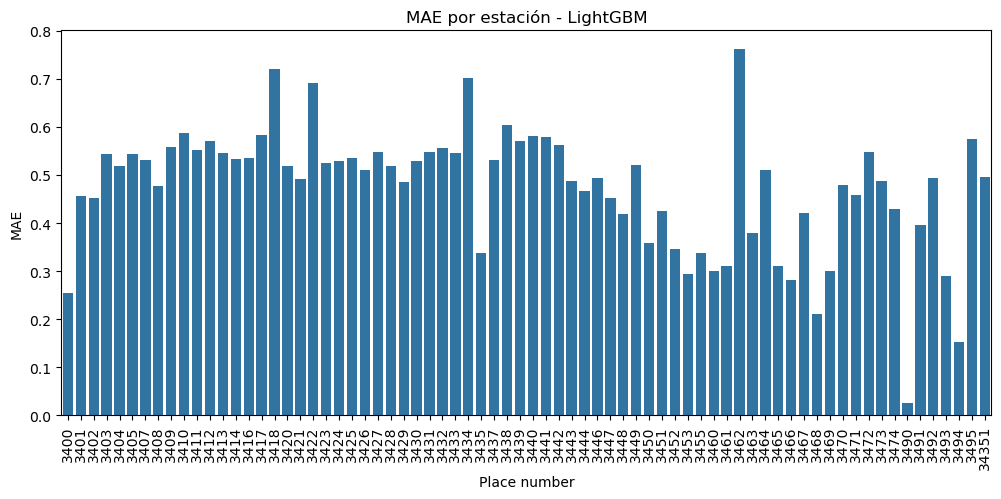

In [22]:
test['predicted'] = y_pred_lgb
error_por_estacion = test.groupby('Place number').apply(
    lambda g: np.mean(np.abs(g['Free bikes'] - g['predicted']))
).reset_index(name='MAE')

plt.figure(figsize=(12,5))
sns.barplot(x='Place number', y='MAE', data=error_por_estacion.sort_values('MAE', ascending=False))
plt.title('MAE por estación - LightGBM')
plt.xticks(rotation=90)
plt.show()

## ✅ Interpretación y visualización de resultados (Punto 7)

Se realizó un análisis visual y estadístico detallado sobre el modelo final seleccionado (LightGBM), con los siguientes resultados:

### 📉 Distribución de errores residuales
- Los errores están centrados alrededor de 0.
- La forma simétrica y concentrada confirma un buen ajuste sin sesgos.

### 📈 Errores absolutos (primeros 500 registros)
- La mayoría de errores están entre 0.0 y 1.5.
- No se observan acumulaciones sistemáticas ni outliers significativos.

### 📍 MAE por estación
- Se calculó el error medio absoluto por estación (`Place number`).
- La mayoría de estaciones muestran un MAE entre 0.3 y 0.6.
- Algunas estaciones con mayor error podrían reflejar comportamiento irregular o falta de datos históricos representativos.

### 📊 Análisis de la variable objetivo (`Free bikes`)
- El **75% de los registros tienen 8 o menos bicicletas libres** por estación y fecha.
- La **media** de bicicletas libres es de **5.70** y la **mediana** es 5.0.
- Esto confirma que el sistema opera mayoritariamente en condiciones de ocupación media o alta, lo que refuerza la utilidad de modelos predictivos para anticipar saturación o vaciado de estaciones.

## Guardar resultados

📦 1. Guardar modelo final (LightGBM)

In [27]:
# Guardar el modelo entrenado
joblib.dump(model_lgb, '../models/modelo_lightgbm.pkl')

['../models/modelo_lightgbm.pkl']

💾 2. Guardar predicciones

In [28]:
# Crear dataframe con predicciones
df_resultados = test[['Time stamp', 'Place number', 'Free bikes']].copy()
df_resultados['Predicción LightGBM'] = y_pred_lgb

# Guardar a CSV
df_resultados.to_csv('../data/predicted/predicciones_lightgbm.csv', index=False)

🖼 3. Guardar gráficos clave

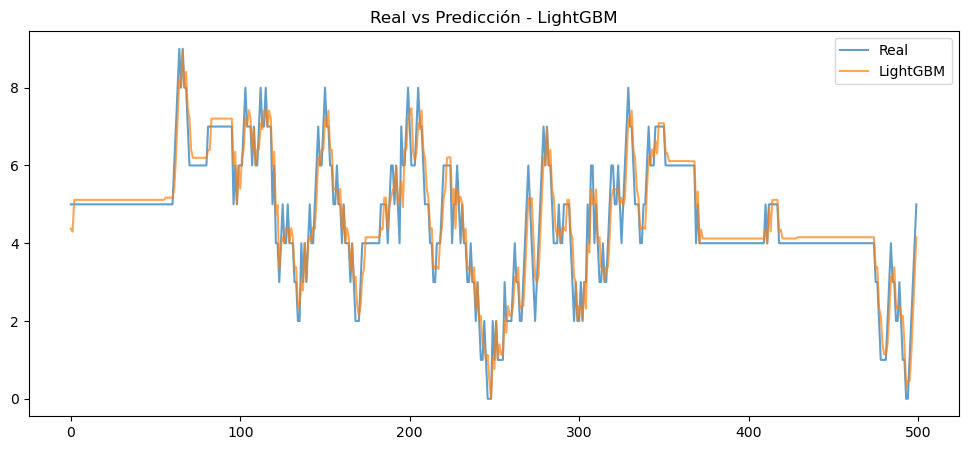

In [30]:
plt.figure(figsize=(12,5))
plt.plot(y_test.values[:500], label='Real', alpha=0.7)
plt.plot(y_pred_lgb[:500], label='LightGBM', alpha=0.7)
plt.legend()
plt.title('Real vs Predicción - LightGBM')
plt.savefig('../docs/images/lightgbm_real_vs_pred.png', dpi=300)